In [2]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import insightface
import os
from datetime import datetime

from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

C:\Users\Vanisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\check_version.py:147: UserWarning: Error fetching version info The read operation timed out
  data = fetch_version_info()


Mengecheck versi dari insight face

In [3]:
print('insightface', insightface.__version__)

insightface 0.7.3


Step 1. Detecting Faces

In [4]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

C:\Users\Vanisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Vanisa/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Vanisa/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Vanisa/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Vanisa/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Vanisa/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112]

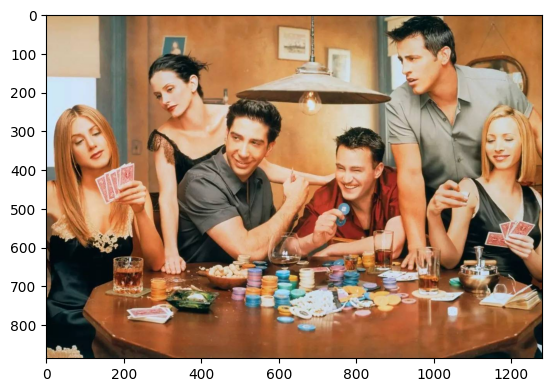

In [5]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [6]:
faces = app.get(img)

Check How Many The Key Directori

In [7]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

Checkiing How Many Faces

In [8]:
len(faces)

6

Cropping The Correct Faces

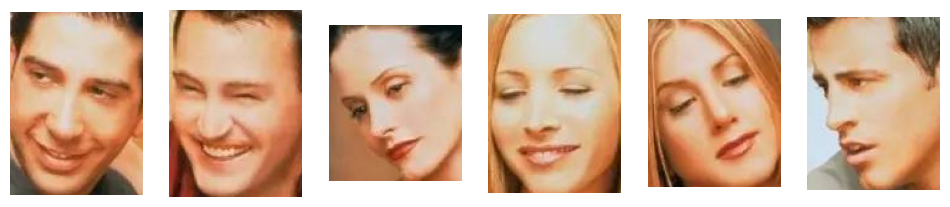

In [9]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i, face in enumerate(faces):
  bbox = face['bbox']
  bbox = [int(b) for b in bbox]
  axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
  axs[i].axis('off')
plt.show()

Step 2. Face Swapping

In [10]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


Checking Each Faces

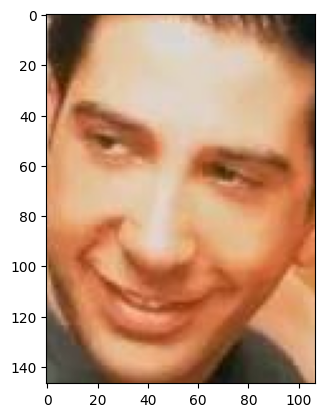

In [11]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [12]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

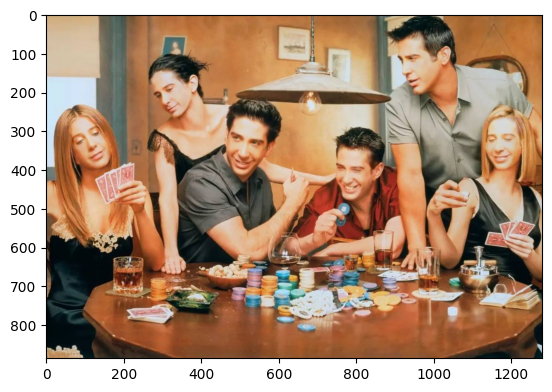

In [13]:
plt.imshow(res[:,:,::-1])
plt.show()

With Inputed Photos

In [14]:
pipsqueak = cv2.imread('images/pipsqueak.jpeg')

In [15]:
print(os.path.exists('images/pipsqueak.jpeg'))

True


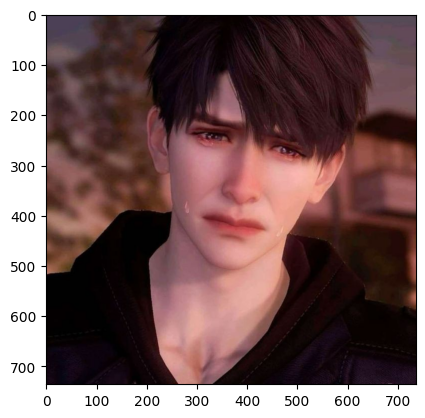

In [16]:
plt.imshow(pipsqueak[:,:,::-1])
plt.show()

Face-swapped image saved to: result\face_swap_20250612_094326.jpg


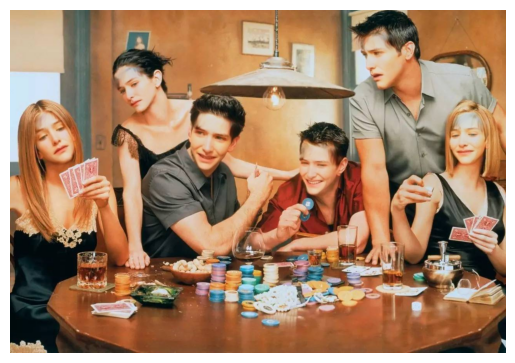

In [17]:
caleb_faces = app.get(pipsqueak)
caleb_face = caleb_faces[0]

res = img.copy()
for face in faces:
    res = swapper.get(res, face, caleb_face, paste_back=True)

result_folder = "result"
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"face_swap_{timestamp}.jpg"
filepath = os.path.join(result_folder, filename)

res_bgr = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
cv2.imwrite(filepath, res_bgr)
cv2.imwrite(filepath, res)

print(f"Face-swapped image saved to: {filepath}")

fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

Testing Another Pictures

In [18]:
mean_girls = cv2.imread('images/meangirls.jpg')

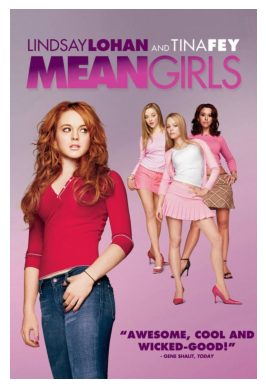

In [19]:
fig, ax = plt.subplots()
ax.imshow(mean_girls[:,:,::-1])
ax.axis('off')
plt.show()

Face-swapped image saved to: result\face_swap_20250612_094346.jpg


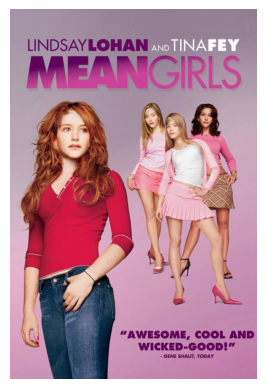

In [20]:
faces = app.get(mean_girls)
res = mean_girls.copy()
for face in faces:
    res = swapper.get(res, face, caleb_face, paste_back=True)

result_folder = "result"
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"face_swap_{timestamp}.jpg"
filepath = os.path.join(result_folder, filename)

res_bgr = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
cv2.imwrite(filepath, res_bgr)
cv2.imwrite(filepath, res)

print(f"Face-swapped image saved to: {filepath}")
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

Swapping 2 Face In One Frame

In [21]:
def swap_same_img(img1_fn, app, swapper, plot_before=True, save_result=True, plot_after=True):
    img1 = cv2.imread(img1_fn)
    
    if plot_before:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.imshow(img1[:, :, ::-1])  
        ax.axis('off')
        ax.set_title('Original Image')
        plt.show()
    
    faces = app.get(img1) 
    
    if len(faces) < 2:
        print(f"Need at least 2 faces, but only found {len(faces)} face(s)")
        return img1
    
    face1, face2 = faces[0], faces[1] 
    
    img1_ = img1.copy()
    
    img1_ = swapper.get(img1_, face1, face2, paste_back=True)
    img1_ = swapper.get(img1_, face2, face1, paste_back=True)
    
    if save_result:
        result_folder = "result"
        if not os.path.exists(result_folder):
            os.makedirs(result_folder)
        
        base_name = os.path.splitext(os.path.basename(img1_fn))[0]
        
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{base_name}_swapped_{timestamp}.jpg"
        filepath = os.path.join(result_folder, filename)
        
        cv2.imwrite(filepath, img1_)
        print(f"Face-swapped image saved to: {filepath}")

    if plot_after:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.imshow(img1_[:, :, ::-1]) 
        ax.axis('off')
        ax.set_title('Swapped Image')
        plt.show()
    
    return img1_

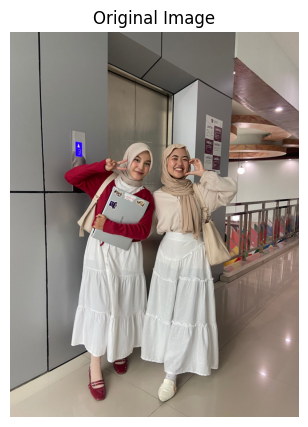

Face-swapped image saved to: result\eva_swapped_20250612_094357.jpg


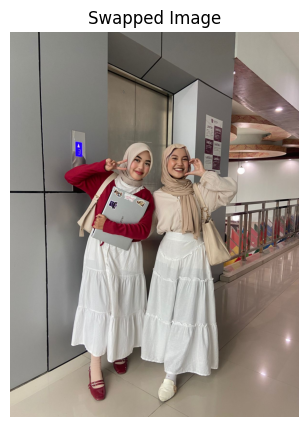

In [22]:
_ = swap_same_img('images/eva.jpg', app, swapper)

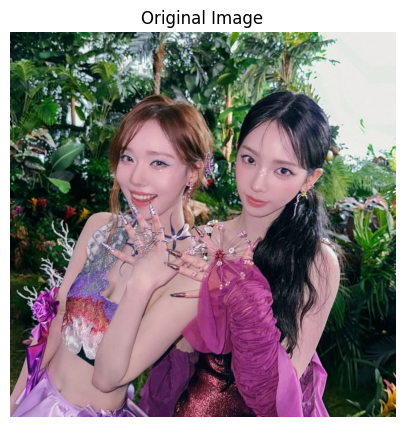

Face-swapped image saved to: result\aespa_swapped_20250612_094407.jpg


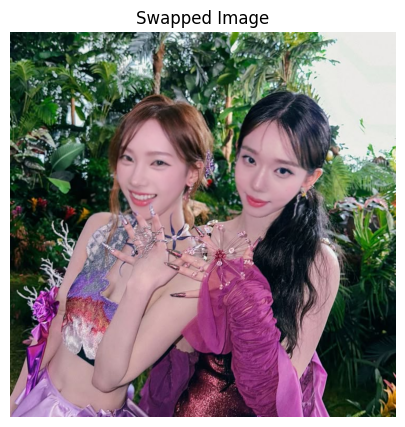

In [23]:
_ = swap_same_img('images/aespa.jpg', app, swapper)

Swaping Between Two Images

In [24]:
def swap_n_show(img1_fn, img2_fn, app, swapper, plot_before=True, save_result=True, plot_after=True):
    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)
    
    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:, :, ::-1])
        axs[0].axis('off')
        axs[0].set_title('Original Image 1')
        axs[1].imshow(img2[:, :, ::-1])
        axs[1].axis('off')
        axs[1].set_title('Original Image 2')
        plt.show()
    
    # Detect faces
    faces1 = app.get(img1)
    faces2 = app.get(img2)
    
    # Check if faces were detected
    if len(faces1) == 0:
        print("No face detected in image 1")
        return img1, img2
    if len(faces2) == 0:
        print("No face detected in image 2")
        return img1, img2
    
    face1 = faces1[0]
    face2 = faces2[0]
    
    # Create copies and perform face swapping
    img1_ = img1.copy()
    img2_ = img2.copy()
    
    # Perform the actual face swapping
    img1_ = swapper.get(img1_, face1, face2, paste_back=True)
    img2_ = swapper.get(img2_, face2, face1, paste_back=True)
    
    if save_result:
        # Create result folder if it doesn't exist
        result_folder = "result"
        if not os.path.exists(result_folder):
            os.makedirs(result_folder)
        
        # Extract original filenames without extensions
        base_name1 = os.path.splitext(os.path.basename(img1_fn))[0]
        base_name2 = os.path.splitext(os.path.basename(img2_fn))[0]
        
        # Generate timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # Create filenames for both swapped images
        filename1 = f"{base_name1}_to_{base_name2}_{timestamp}.jpg"
        filename2 = f"{base_name2}_to_{base_name1}_{timestamp}.jpg"
        
        filepath1 = os.path.join(result_folder, filename1)
        filepath2 = os.path.join(result_folder, filename2)
        
        # Save both swapped images
        cv2.imwrite(filepath1, img1_)
        cv2.imwrite(filepath2, img2_)

    if plot_after:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_[:, :, ::-1]) 
        axs[0].axis('off')
        axs[0].set_title('Swapped Image 1')
        axs[1].imshow(img2_[:, :, ::-1])  
        axs[1].axis('off')
        axs[1].set_title('Swapped Image 2')
        plt.show()
    
    return img1_, img2_

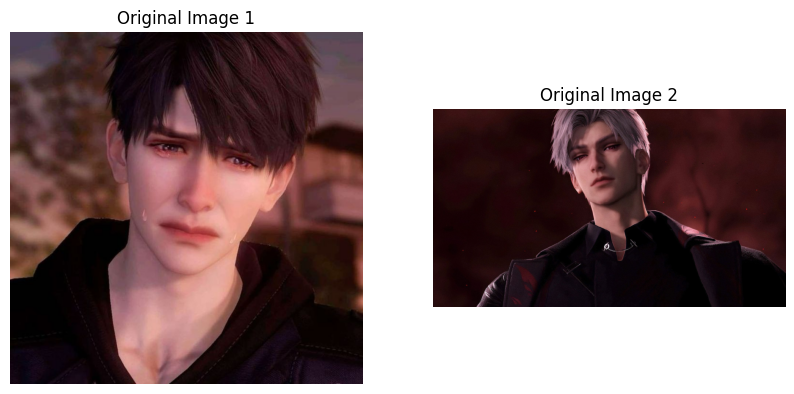

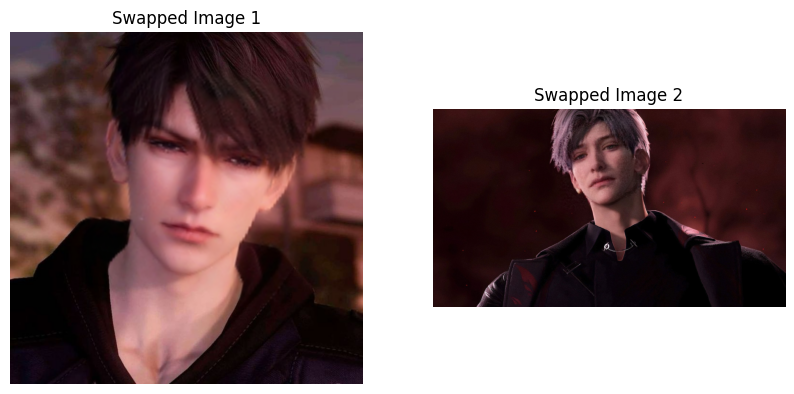

In [25]:
_ = swap_n_show('images/pipsqueak.jpeg','images/crow.jpg', app, swapper)

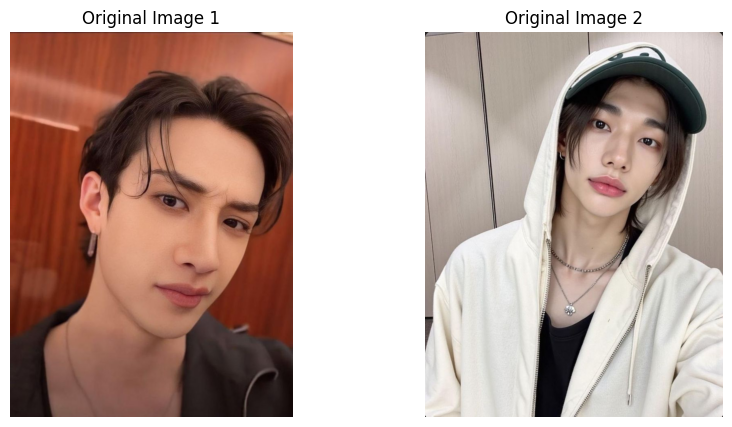

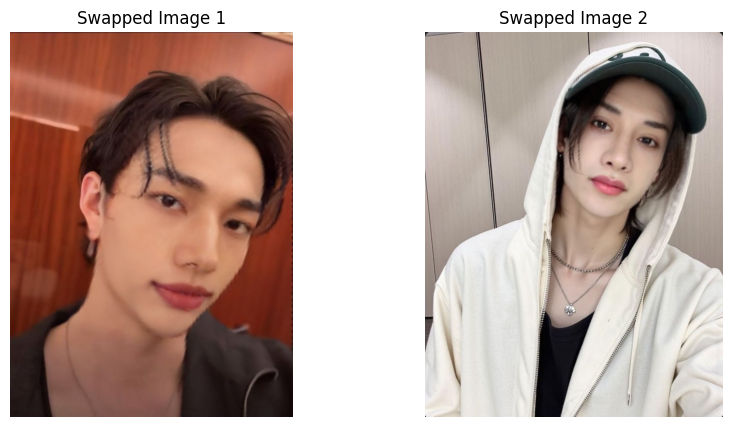

In [26]:
_ = swap_n_show('images/chanie.jpg','images/hwang.jpg', app, swapper)

In [27]:
from glob import glob
couples = glob('couple*')

In [28]:
for couple in couples:
    _ = swap_same_img(couple, app, swapper)